# Phân tích dữ liệu Premier League



## 1. Khởi tạo và đọc dữ liệu

Đầu tiên, chúng ta cần import các thư viện cần thiết và đọc dữ liệu.


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [25]:
# Tắt cảnh báo để cho output gọn hơn
warnings.filterwarnings('ignore')
# Hiển thị đầy đủ các cột của DataFrame
pd.set_option('display.max_columns', None)

# Thiết lập style cho seaborn
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Đọc dữ liệu từ CSV - ví dụ với tên file pl_data.csv
# Nếu dữ liệu của bạn đang ở dạng khác, hãy thay đổi phù hợp
df = pd.read_csv(r'D:\Desktop\tap tanh hoc code\.vscode\DAP\Reddit_Sentiment_Analysis\dataframe\match_full_info.csv')

df = df.drop(df.columns[0:2], axis=1)

# Hiển thị 5 dòng đầu tiên để kiểm tra
df.head()

,Day,Date,Time,Home,xG_Home,Score,xG_Away,Away,Attendance,Venue,Referee,Match_Report_Link,Manager_Home,Manager_Away,Lineup_Home,Lineup_Away,Fouls_Home,Fouls_Away,Corners_Home,Corners_Away,Crosses_Home,Crosses_Away,Touches_Home,Touches_Away,Tackles_Home,Tackles_Away,Possession_Home,Possession_Away,Shots_on_Target_Home,Shots_on_Target_Away,Yellow_Cards_Home,Yellow_Cards_Away,Red_Cards_Home,Red_Cards_Away
0,Fri,2024-08-16,20:00 (02:00),Manchester Utd,2.4,1–0,0.4,Fulham,"73,297",Old Trafford,Robert Jones,/en/matches/cc5b4244/Manchester-United-Fulham-...,Erik ten Hag,Marco Silva,4-2-3-1,4-2-3-1,12.0,10.0,7.0,8.0,18.0,21.0,640.0,540.0,21.0,24.0,55%,45%,36%,20%,2,3,0,0
1,Sat,2024-08-17,12:30 (18:30),Ipswich Town,0.5,0–2,2.6,Liverpool,"30,014",Portman Road Stadium,Tim Robinson,/en/matches/a1d0d529/Ipswich-Town-Liverpool-Au...,Kieran McKenna,Arne Slot,4-2-3-1,4-2-3-1,9.0,18.0,2.0,10.0,8.0,23.0,497.0,720.0,20.0,9.0,38%,62%,29%,28%,3,1,0,0
2,Sat,2024-08-17,15:00 (21:00),Newcastle Utd,0.3,1–0,1.8,Southampton,"52,196",St James' Park,Craig Pawson,/en/matches/34557647/Newcastle-United-Southamp...,Eddie Howe,Russell Martin,4-3-3,3-5-2,15.0,16.0,3.0,12.0,12.0,30.0,317.0,788.0,16.0,13.0,23%,77%,33%,16%,2,4,1,0
3,Sat,2024-08-17,15:00 (21:00),Nott'ham Forest,1.3,1–1,1.2,Bournemouth,"29,763",The City Ground,Michael Oliver,/en/matches/4efc72e4/Nottingham-Forest-Bournem...,Nuno Espírito Santo,Andoni Iraola,4-2-3-1,4-2-3-1,17.0,8.0,2.0,6.0,13.0,25.0,677.0,628.0,24.0,18.0,53%,47%,57%,31%,1,3,0,0
4,Sat,2024-08-17,15:00 (21:00),Everton,0.5,0–3,1.4,Brighton,"39,217",Goodison Park,Simon Hooper,/en/matches/71618ace/Everton-Brighton-and-Hove...,Sean Dyche,Fabian Hürzeler,4-2-3-1,4-2-3-1,8.0,8.0,1.0,5.0,17.0,14.0,499.0,711.0,23.0,21.0,40%,60%,11%,50%,1,1,1,0



## 2. Khám phá dữ liệu và tiền xử lý

Chúng ta cần hiểu cấu trúc dữ liệu và tiền xử lý nếu cần.


In [26]:
# Kiểm tra thông tin dữ liệu
print("Thông tin dữ liệu:")
df.info()

Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Day                   380 non-null    object 
 1   Date                  380 non-null    object 
 2   Time                  380 non-null    object 
 3   Home                  380 non-null    object 
 4   xG_Home               259 non-null    float64
 5   Score                 259 non-null    object 
 6   xG_Away               259 non-null    float64
 7   Away                  380 non-null    object 
 8   Attendance            257 non-null    object 
 9   Venue                 380 non-null    object 
 10  Referee               259 non-null    object 
 11  Match_Report_Link     380 non-null    object 
 12  Manager_Home          380 non-null    object 
 13  Manager_Away          380 non-null    object 
 14  Lineup_Home           259 non-null    object 
 15  Line

In [27]:
# Kiểm tra các giá trị null
print("\nSố lượng giá trị null trong mỗi cột:")
print(df.isnull().sum())



Số lượng giá trị null trong mỗi cột:
Day                       0
Date                      0
Time                      0
Home                      0
xG_Home                 121
Score                   121
xG_Away                 121
Away                      0
Attendance              123
Venue                     0
Referee                 121
Match_Report_Link         0
Manager_Home              0
Manager_Away              0
Lineup_Home             121
Lineup_Away             121
Fouls_Home              121
Fouls_Away              121
Corners_Home            121
Corners_Away            121
Crosses_Home            121
Crosses_Away            121
Touches_Home            121
Touches_Away            121
Tackles_Home            121
Tackles_Away            121
Possession_Home         121
Possession_Away         121
Shots_on_Target_Home    121
Shots_on_Target_Away    121
Yellow_Cards_Home         0
Yellow_Cards_Away         0
Red_Cards_Home            0
Red_Cards_Away            0
dtype: int

In [28]:

# Kiểm tra thống kê mô tả
print("\nThống kê mô tả cho dữ liệu số:")
print(df.describe())



Thống kê mô tả cho dữ liệu số:
          xG_Home     xG_Away  Fouls_Home  Fouls_Away  Corners_Home  \
count  259.000000  259.000000  259.000000  259.000000    259.000000   
mean     1.526641    1.377606   10.996139   11.428571      5.583012   
std      0.808785    0.860616    3.720359    3.554356      3.229566   
min      0.100000    0.000000    2.000000    3.000000      0.000000   
25%      0.900000    0.800000    9.000000    9.000000      3.000000   
50%      1.500000    1.200000   11.000000   11.000000      5.000000   
75%      2.000000    1.750000   13.000000   14.000000      8.000000   
max      4.400000    5.600000   21.000000   21.000000     17.000000   

       Corners_Away  Crosses_Home  Crosses_Away  Touches_Home  Touches_Away  \
count    259.000000     259.00000    259.000000    259.000000    259.000000   
mean       4.911197      19.15444     15.876448    608.254826    595.474903   
std        3.010935       8.22876      6.701280    109.461954    108.808925   
min        0

In [29]:
# Chuyển đổi cột Date thành định dạng datetime
df['Date'] = pd.to_datetime(df['Date'])

# Tách cột Time để dễ phân tích
df['Time'] = df['Time'].str.split(' ').str[0]

# Xử lý cột Score để lấy số bàn thắng
df[['Home_Goals', 'Away_Goals']] = df['Score'].str.split('–', expand=True).astype(float)
df['Total_Goals'] = df['Home_Goals'] + df['Away_Goals']
df['Goal_Difference'] = df['Home_Goals'] - df['Away_Goals']
df.head()

,Day,Date,Time,Home,xG_Home,Score,xG_Away,Away,Attendance,Venue,Referee,Match_Report_Link,Manager_Home,Manager_Away,Lineup_Home,Lineup_Away,Fouls_Home,Fouls_Away,Corners_Home,Corners_Away,Crosses_Home,Crosses_Away,Touches_Home,Touches_Away,Tackles_Home,Tackles_Away,Possession_Home,Possession_Away,Shots_on_Target_Home,Shots_on_Target_Away,Yellow_Cards_Home,Yellow_Cards_Away,Red_Cards_Home,Red_Cards_Away,Home_Goals,Away_Goals,Total_Goals,Goal_Difference
0,Fri,2024-08-16,20:00,Manchester Utd,2.4,1–0,0.4,Fulham,"73,297",Old Trafford,Robert Jones,/en/matches/cc5b4244/Manchester-United-Fulham-...,Erik ten Hag,Marco Silva,4-2-3-1,4-2-3-1,12.0,10.0,7.0,8.0,18.0,21.0,640.0,540.0,21.0,24.0,55%,45%,36%,20%,2,3,0,0,1.0,0.0,1.0,1.0
1,Sat,2024-08-17,12:30,Ipswich Town,0.5,0–2,2.6,Liverpool,"30,014",Portman Road Stadium,Tim Robinson,/en/matches/a1d0d529/Ipswich-Town-Liverpool-Au...,Kieran McKenna,Arne Slot,4-2-3-1,4-2-3-1,9.0,18.0,2.0,10.0,8.0,23.0,497.0,720.0,20.0,9.0,38%,62%,29%,28%,3,1,0,0,0.0,2.0,2.0,-2.0
2,Sat,2024-08-17,15:00,Newcastle Utd,0.3,1–0,1.8,Southampton,"52,196",St James' Park,Craig Pawson,/en/matches/34557647/Newcastle-United-Southamp...,Eddie Howe,Russell Martin,4-3-3,3-5-2,15.0,16.0,3.0,12.0,12.0,30.0,317.0,788.0,16.0,13.0,23%,77%,33%,16%,2,4,1,0,1.0,0.0,1.0,1.0
3,Sat,2024-08-17,15:00,Nott'ham Forest,1.3,1–1,1.2,Bournemouth,"29,763",The City Ground,Michael Oliver,/en/matches/4efc72e4/Nottingham-Forest-Bournem...,Nuno Espírito Santo,Andoni Iraola,4-2-3-1,4-2-3-1,17.0,8.0,2.0,6.0,13.0,25.0,677.0,628.0,24.0,18.0,53%,47%,57%,31%,1,3,0,0,1.0,1.0,2.0,0.0
4,Sat,2024-08-17,15:00,Everton,0.5,0–3,1.4,Brighton,"39,217",Goodison Park,Simon Hooper,/en/matches/71618ace/Everton-Brighton-and-Hove...,Sean Dyche,Fabian Hürzeler,4-2-3-1,4-2-3-1,8.0,8.0,1.0,5.0,17.0,14.0,499.0,711.0,23.0,21.0,40%,60%,11%,50%,1,1,1,0,0.0,3.0,3.0,-3.0


In [30]:
# Tạo cột kết quả cho đội nhà
df['Result_Home'] = np.where(df['Home_Goals'] > df['Away_Goals'], 'Win',
                       np.where(df['Home_Goals'] < df['Away_Goals'], 'Loss', 'Draw'))

# Tạo cột phân biệt trận đấu có bàn thắng hay không
df['Had_Goals'] = df['Total_Goals'] > 0

# Chuyển đổi % thành số
df['Possession_Home'] = df['Possession_Home'].str.rstrip('%').astype(float)
df['Possession_Away'] = df['Possession_Away'].str.rstrip('%').astype(float)
df['Shots_on_Target_Home'] = df['Shots_on_Target_Home'].str.rstrip('%').astype(float)
df['Shots_on_Target_Away'] = df['Shots_on_Target_Away'].str.rstrip('%').astype(float)
df['Attendance'] = df['Attendance'].str.replace(',', '').astype(float)

# Kiểm tra lại dữ liệu sau khi xử lý
df.head()


,Day,Date,Time,Home,xG_Home,Score,xG_Away,Away,Attendance,Venue,Referee,Match_Report_Link,Manager_Home,Manager_Away,Lineup_Home,Lineup_Away,Fouls_Home,Fouls_Away,Corners_Home,Corners_Away,Crosses_Home,Crosses_Away,Touches_Home,Touches_Away,Tackles_Home,Tackles_Away,Possession_Home,Possession_Away,Shots_on_Target_Home,Shots_on_Target_Away,Yellow_Cards_Home,Yellow_Cards_Away,Red_Cards_Home,Red_Cards_Away,Home_Goals,Away_Goals,Total_Goals,Goal_Difference,Result_Home,Had_Goals
0,Fri,2024-08-16,20:00,Manchester Utd,2.4,1–0,0.4,Fulham,73297.0,Old Trafford,Robert Jones,/en/matches/cc5b4244/Manchester-United-Fulham-...,Erik ten Hag,Marco Silva,4-2-3-1,4-2-3-1,12.0,10.0,7.0,8.0,18.0,21.0,640.0,540.0,21.0,24.0,55.0,45.0,36.0,20.0,2,3,0,0,1.0,0.0,1.0,1.0,Win,True
1,Sat,2024-08-17,12:30,Ipswich Town,0.5,0–2,2.6,Liverpool,30014.0,Portman Road Stadium,Tim Robinson,/en/matches/a1d0d529/Ipswich-Town-Liverpool-Au...,Kieran McKenna,Arne Slot,4-2-3-1,4-2-3-1,9.0,18.0,2.0,10.0,8.0,23.0,497.0,720.0,20.0,9.0,38.0,62.0,29.0,28.0,3,1,0,0,0.0,2.0,2.0,-2.0,Loss,True
2,Sat,2024-08-17,15:00,Newcastle Utd,0.3,1–0,1.8,Southampton,52196.0,St James' Park,Craig Pawson,/en/matches/34557647/Newcastle-United-Southamp...,Eddie Howe,Russell Martin,4-3-3,3-5-2,15.0,16.0,3.0,12.0,12.0,30.0,317.0,788.0,16.0,13.0,23.0,77.0,33.0,16.0,2,4,1,0,1.0,0.0,1.0,1.0,Win,True
3,Sat,2024-08-17,15:00,Nott'ham Forest,1.3,1–1,1.2,Bournemouth,29763.0,The City Ground,Michael Oliver,/en/matches/4efc72e4/Nottingham-Forest-Bournem...,Nuno Espírito Santo,Andoni Iraola,4-2-3-1,4-2-3-1,17.0,8.0,2.0,6.0,13.0,25.0,677.0,628.0,24.0,18.0,53.0,47.0,57.0,31.0,1,3,0,0,1.0,1.0,2.0,0.0,Draw,True
4,Sat,2024-08-17,15:00,Everton,0.5,0–3,1.4,Brighton,39217.0,Goodison Park,Simon Hooper,/en/matches/71618ace/Everton-Brighton-and-Hove...,Sean Dyche,Fabian Hürzeler,4-2-3-1,4-2-3-1,8.0,8.0,1.0,5.0,17.0,14.0,499.0,711.0,23.0,21.0,40.0,60.0,11.0,50.0,1,1,1,0,0.0,3.0,3.0,-3.0,Loss,True



## 3. Phân tích và Trực quan hóa dữ liệu

### 3.1 Phân tích thời gian và lịch thi đấu


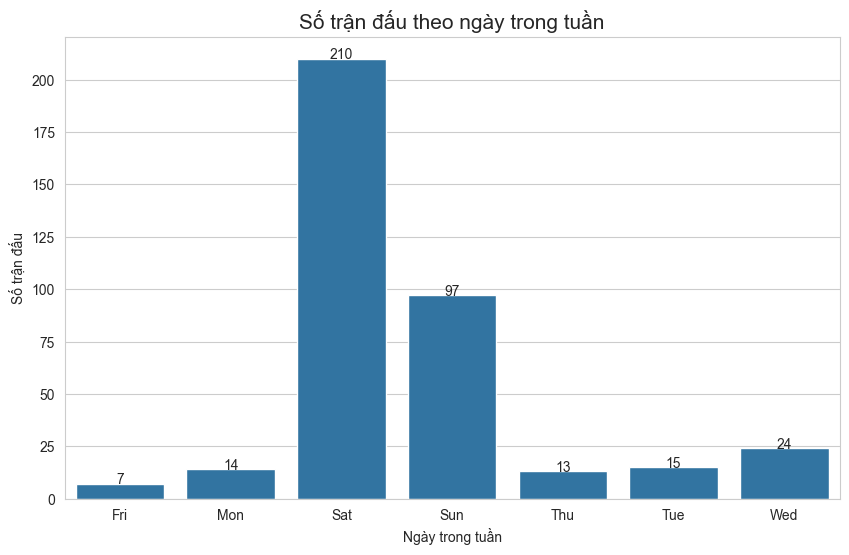

In [31]:

# Phân tích theo ngày trong tuần
plt.figure(figsize=(10, 6))
day_counts = df['Day'].value_counts().sort_index()
ax = sns.barplot(x=day_counts.index, y=day_counts.values)
plt.title('Số trận đấu theo ngày trong tuần', fontsize=15)
plt.xlabel('Ngày trong tuần')
plt.ylabel('Số trận đấu')

# Thêm giá trị lên đầu mỗi cột
for i, v in enumerate(day_counts.values):
    ax.text(i, v + 0.1, str(v), ha='center')

plt.show()


tập trung chủ yếu vào thứ bảy chủ nhật

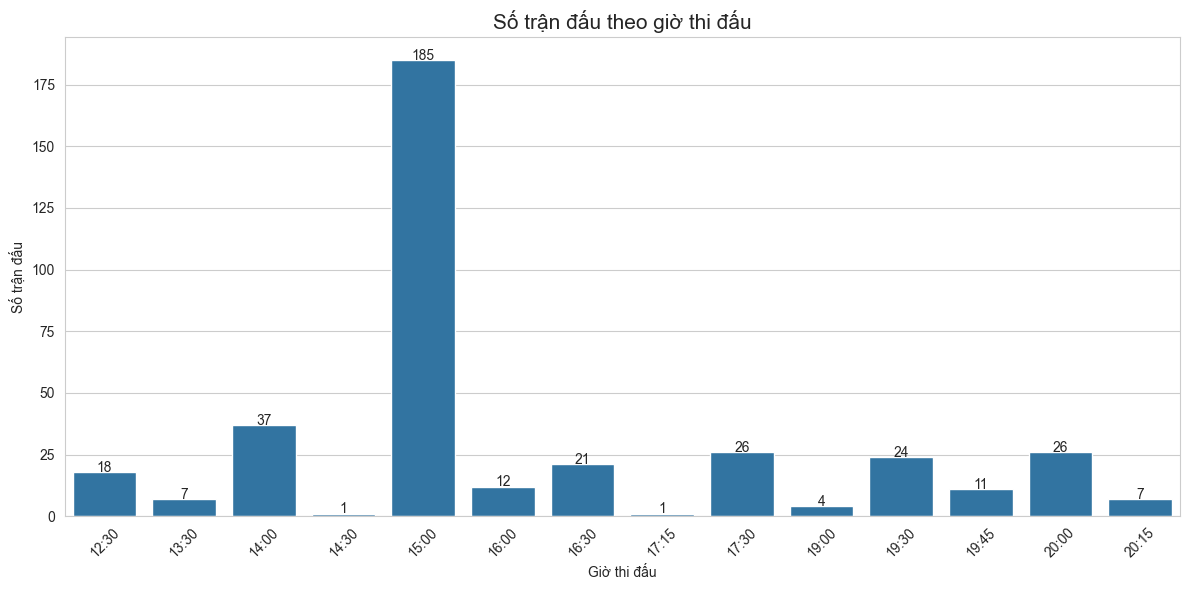

In [32]:

# Phân tích theo giờ thi đấu
plt.figure(figsize=(12, 6))
time_counts = df['Time'].value_counts().sort_index()
ax = sns.barplot(x=time_counts.index, y=time_counts.values)
plt.title('Số trận đấu theo giờ thi đấu', fontsize=15)
plt.xlabel('Giờ thi đấu')
plt.ylabel('Số trận đấu')
plt.xticks(rotation=45)

# Thêm giá trị lên đầu mỗi cột
for i, v in enumerate(time_counts.values):
    ax.text(i, v + 0.1, str(v), ha='center')

plt.tight_layout()
plt.show()


đá tầm 3h chiều

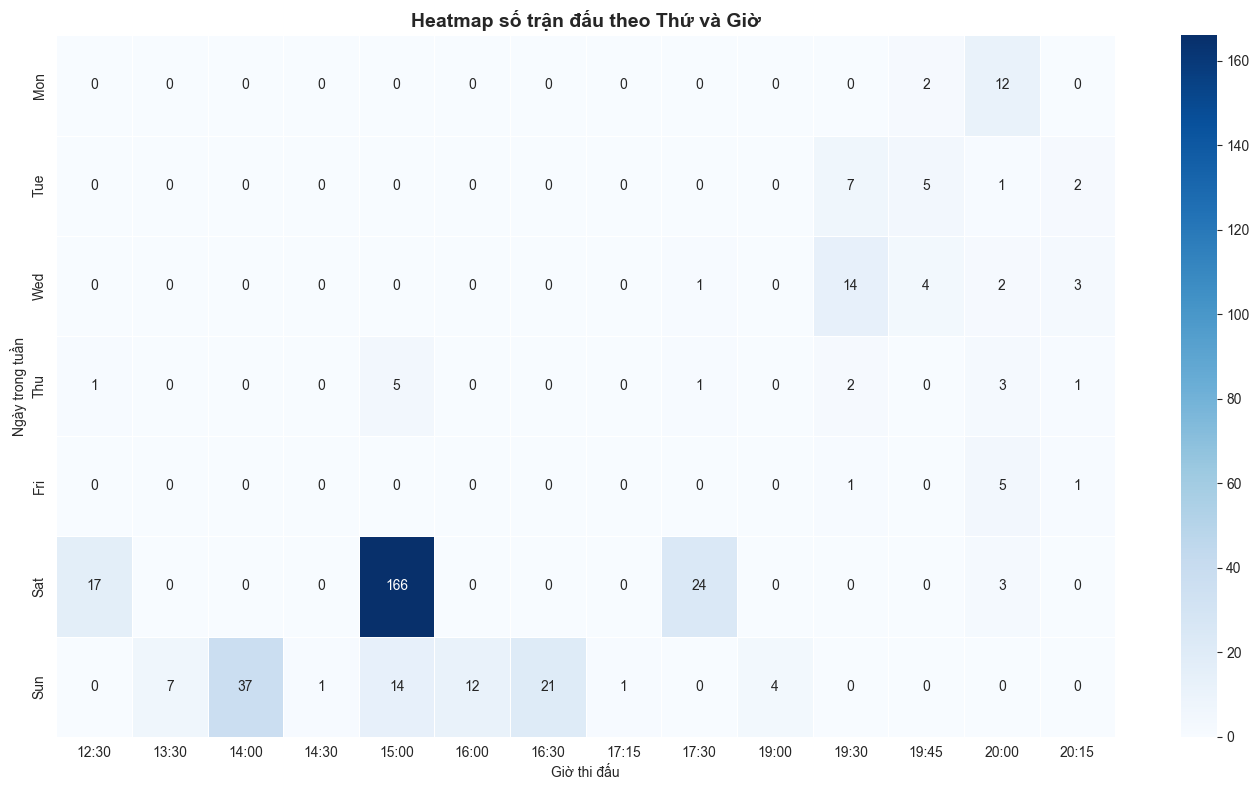

In [33]:
# Heatmap ngày và giờ thi đấu
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
cross_tab = pd.crosstab(df['Day'], df['Time'])
cross_tab = cross_tab.reindex(day_order)

plt.figure(figsize=(14, 8))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d', linewidths= 0.5)
plt.title("Heatmap số trận đấu theo Thứ và Giờ", fontsize=14, fontweight="bold")
plt.xlabel('Giờ thi đấu')
plt.ylabel('Ngày trong tuần')
plt.tight_layout()
plt.show()


3h chiều t7 

### 3.2 Phân tích điểm số và xG

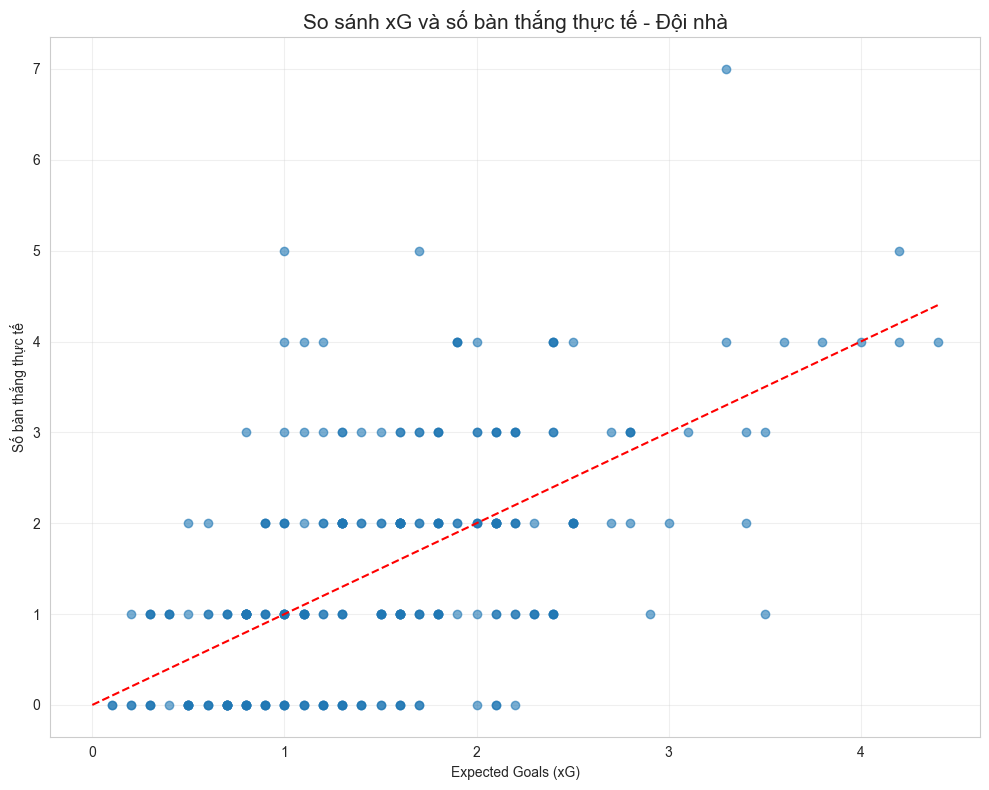

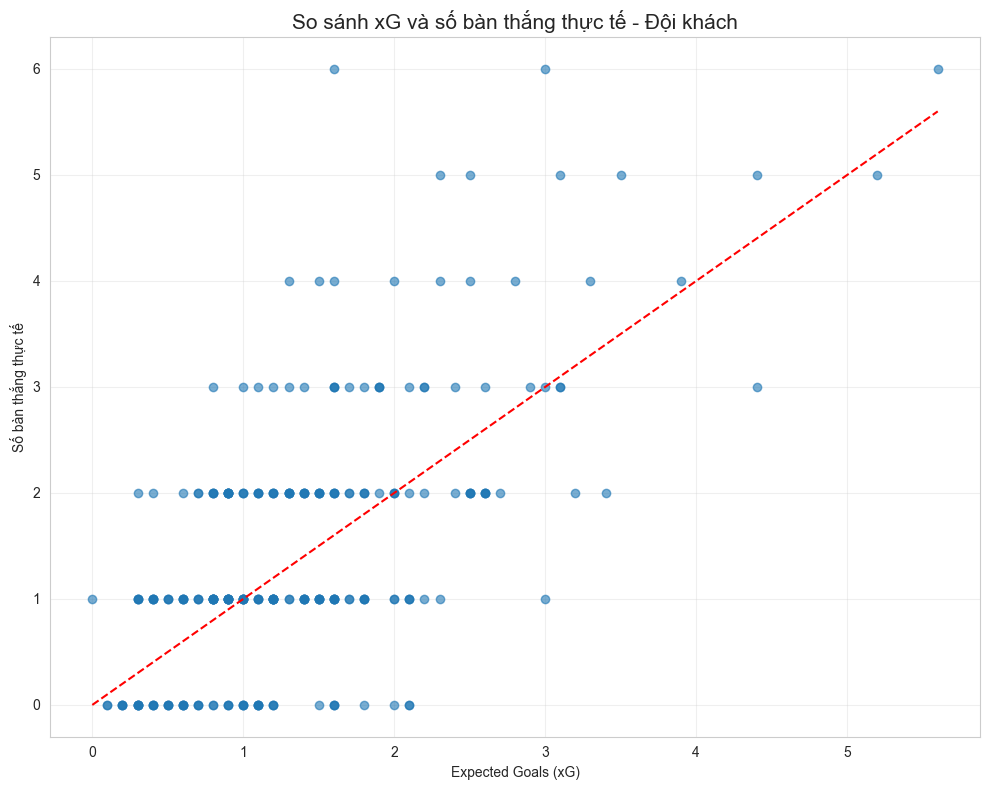

In [34]:
# Tạo Scatterplot so sánh xG và số bàn thắng thực tế cho đội nhà
plt.figure(figsize=(10, 8))
plt.scatter(df['xG_Home'], df['Home_Goals'], alpha=0.6)
plt.plot([0, df['xG_Home'].max()], [0, df['xG_Home'].max()], 'r--')  # Đường tham chiếu
plt.title('So sánh xG và số bàn thắng thực tế - Đội nhà', fontsize=15)
plt.xlabel('Expected Goals (xG)')
plt.ylabel('Số bàn thắng thực tế')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Tạo Scatterplot so sánh xG và số bàn thắng thực tế cho đội khách
plt.figure(figsize=(10, 8))
plt.scatter(df['xG_Away'], df['Away_Goals'], alpha=0.6)
plt.plot([0, df['xG_Away'].max()], [0, df['xG_Away'].max()], 'r--')  # Đường tham chiếu
plt.title('So sánh xG và số bàn thắng thực tế - Đội khách', fontsize=15)
plt.xlabel('Expected Goals (xG)')
plt.ylabel('Số bàn thắng thực tế')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


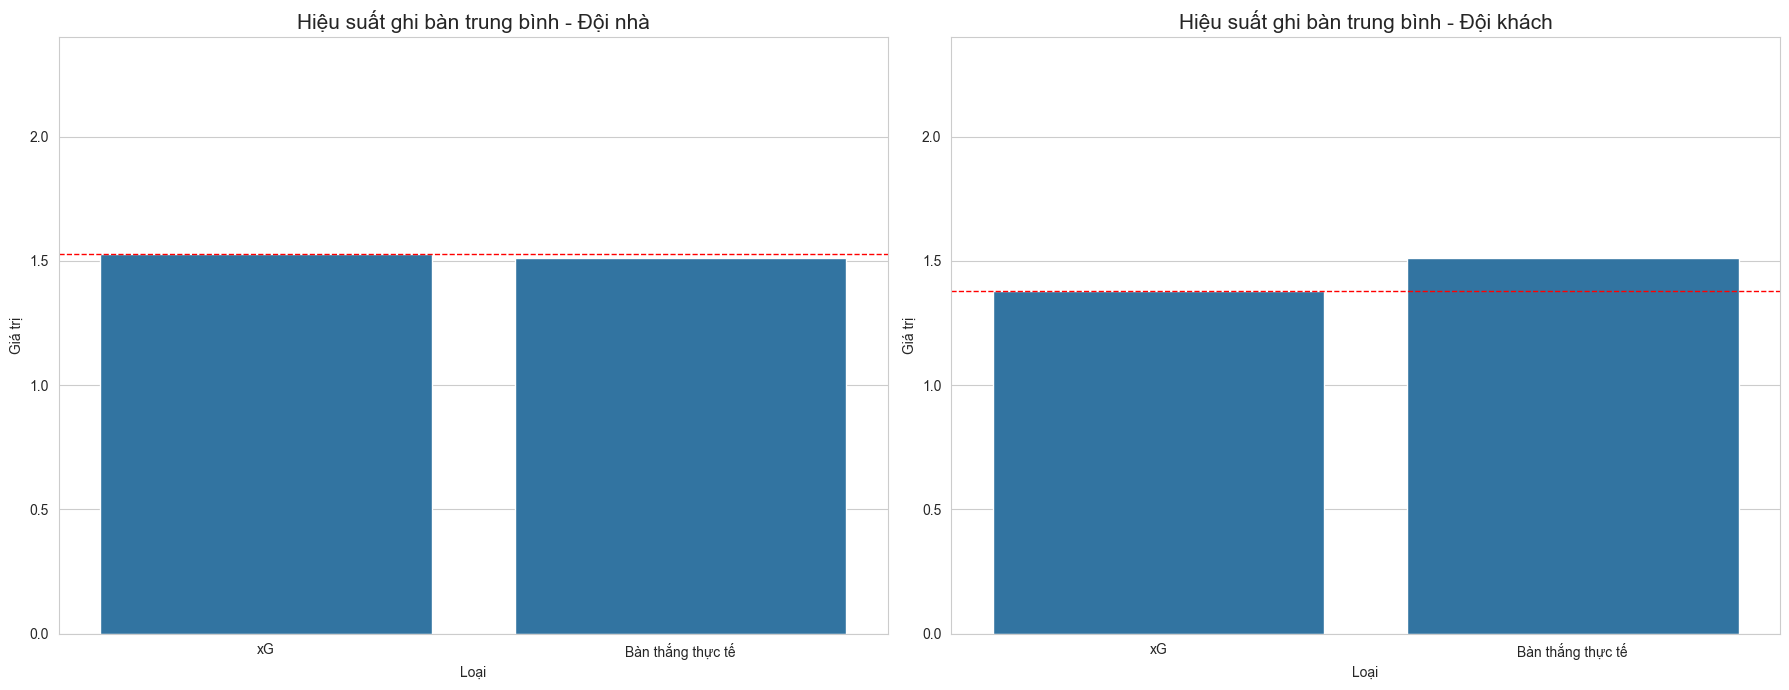

In [35]:
# So sánh hiệu suất ghi bàn giữa đội nhà và đội khách
fig, ax = plt.subplots(1, 2, figsize=(18, 7))

# Hiệu suất đội nhà
home_performance = pd.DataFrame({
    'Loại': ['xG', 'Bàn thắng thực tế'],
    'Giá trị': [df['xG_Home'].mean(), df['Home_Goals'].mean()]
})

sns.barplot(x='Loại', y='Giá trị', data=home_performance, ax=ax[0])
ax[0].set_title('Hiệu suất ghi bàn trung bình - Đội nhà', fontsize=15)
ax[0].set_ylim(0, max(home_performance['Giá trị'].max(), 2) * 1.2)
ax[0].axhline(df['xG_Home'].mean(), color='red', linestyle='--', linewidth=1)

# Hiệu suất đội khách
away_performance = pd.DataFrame({
    'Loại': ['xG', 'Bàn thắng thực tế'],
    'Giá trị': [df['xG_Away'].mean(), df['Away_Goals'].mean()]
})

sns.barplot(x='Loại', y='Giá trị', data=away_performance, ax=ax[1])
ax[1].set_title('Hiệu suất ghi bàn trung bình - Đội khách', fontsize=15)
ax[1].set_ylim(0, max(away_performance['Giá trị'].max(), 2) * 1.2)
ax[1].axhline(df['xG_Away'].mean(), color='red', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()


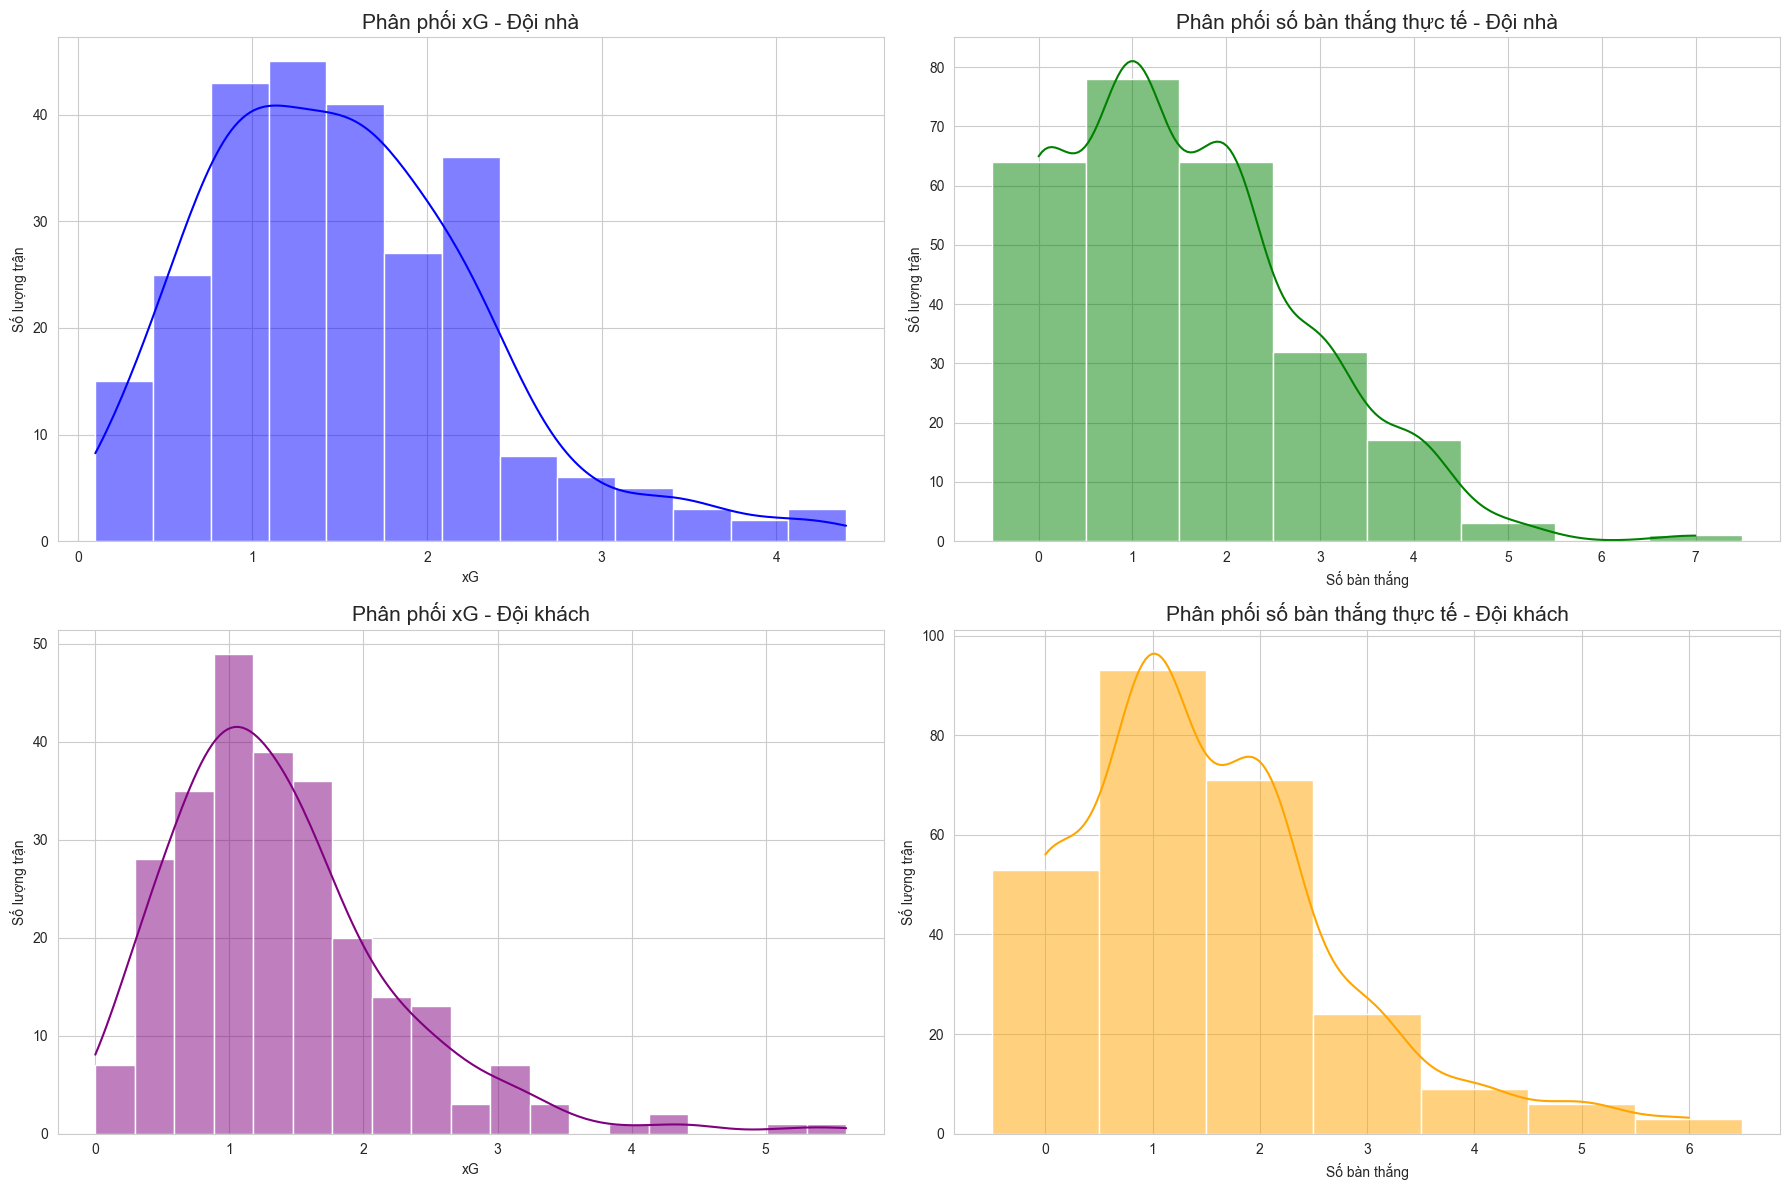

In [36]:

# Tạo biểu đồ phân phối cho xG và số bàn thắng thực tế
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# xG Đội nhà
sns.histplot(df['xG_Home'], kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Phân phối xG - Đội nhà', fontsize=15)
axes[0, 0].set_xlabel('xG')
axes[0, 0].set_ylabel('Số lượng trận')

# Bàn thắng thực tế đội nhà
sns.histplot(df['Home_Goals'], kde=True, ax=axes[0, 1], color='green', discrete=True)
axes[0, 1].set_title('Phân phối số bàn thắng thực tế - Đội nhà', fontsize=15)
axes[0, 1].set_xlabel('Số bàn thắng')
axes[0, 1].set_ylabel('Số lượng trận')

# xG Đội khách
sns.histplot(df['xG_Away'], kde=True, ax=axes[1, 0], color='purple')
axes[1, 0].set_title('Phân phối xG - Đội khách', fontsize=15)
axes[1, 0].set_xlabel('xG')
axes[1, 0].set_ylabel('Số lượng trận')

# Bàn thắng thực tế đội khách
sns.histplot(df['Away_Goals'], kde=True, ax=axes[1, 1], color='orange', discrete=True)
axes[1, 1].set_title('Phân phối số bàn thắng thực tế - Đội khách', fontsize=15)
axes[1, 1].set_xlabel('Số bàn thắng')
axes[1, 1].set_ylabel('Số lượng trận')

plt.tight_layout()
plt.show()


### 3.3 Phân tích hiệu suất các đội

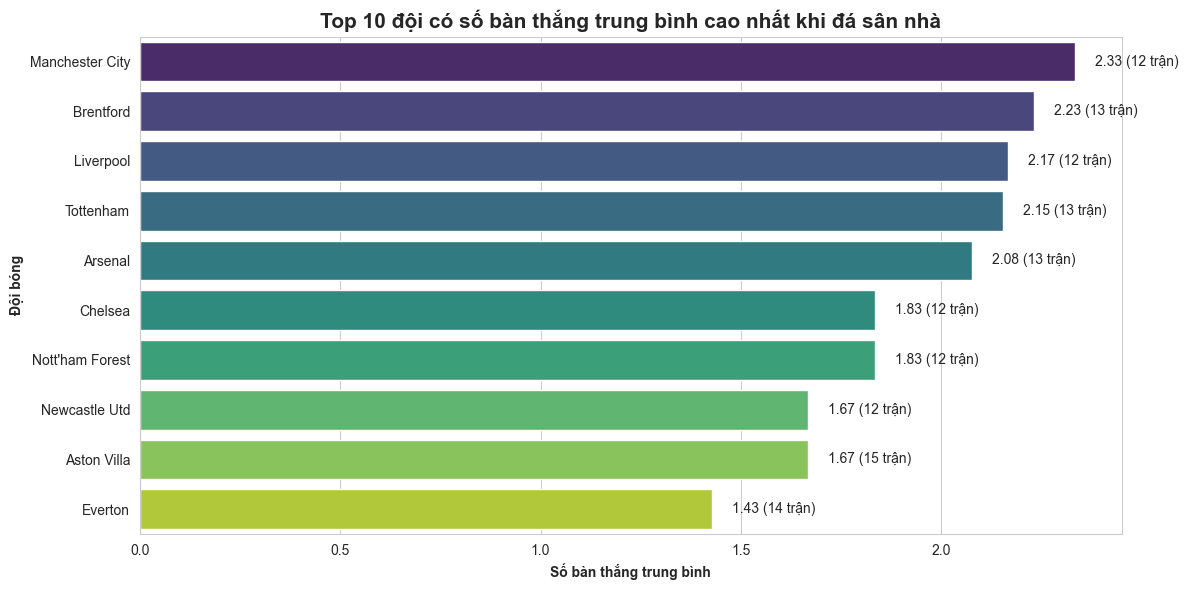

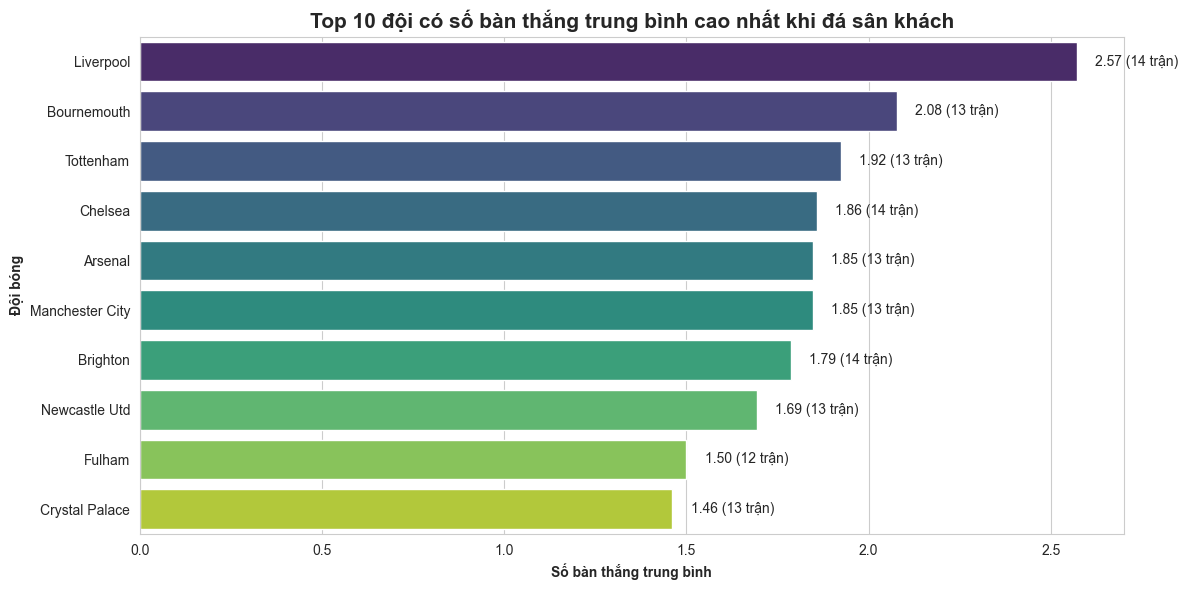

In [37]:
# Top 10 đội có số bàn thắng trung bình cao nhất khi đá sân nhà
home_goals_by_team = df.groupby('Home')['Home_Goals'].agg(['mean', 'count']).reset_index()
home_goals_by_team = home_goals_by_team.sort_values('mean', ascending=False).head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='mean', y='Home', data=home_goals_by_team, palette='viridis')
plt.title('Top 10 đội có số bàn thắng trung bình cao nhất khi đá sân nhà', fontsize=15, fontweight='bold')
plt.xlabel('Số bàn thắng trung bình', fontweight='bold')
plt.ylabel('Đội bóng', fontweight='bold')

# Thêm số trận đấu vào cuối mỗi thanh
for i, v in enumerate(home_goals_by_team['mean']):
    ax.text(v + 0.05, i, f"{v:.2f} ({home_goals_by_team['count'].iloc[i]} trận)", va='center')

plt.tight_layout()
plt.show()

# Top 10 đội có số bàn thắng trung bình cao nhất khi đá sân khách
home_goals_by_team = df.groupby('Away')['Away_Goals'].agg(['mean', 'count']).reset_index()
home_goals_by_team = home_goals_by_team.sort_values('mean', ascending=False).head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='mean', y='Away', data=home_goals_by_team, palette='viridis')
plt.title('Top 10 đội có số bàn thắng trung bình cao nhất khi đá sân khách', fontsize=15, fontweight='bold')
plt.xlabel('Số bàn thắng trung bình', fontweight='bold')
plt.ylabel('Đội bóng', fontweight='bold')

# Thêm số trận đấu vào cuối mỗi thanh
for i, v in enumerate(home_goals_by_team['mean']):
    ax.text(v + 0.05, i, f"{v:.2f} ({home_goals_by_team['count'].iloc[i]} trận)", va='center')

plt.tight_layout()
plt.show()


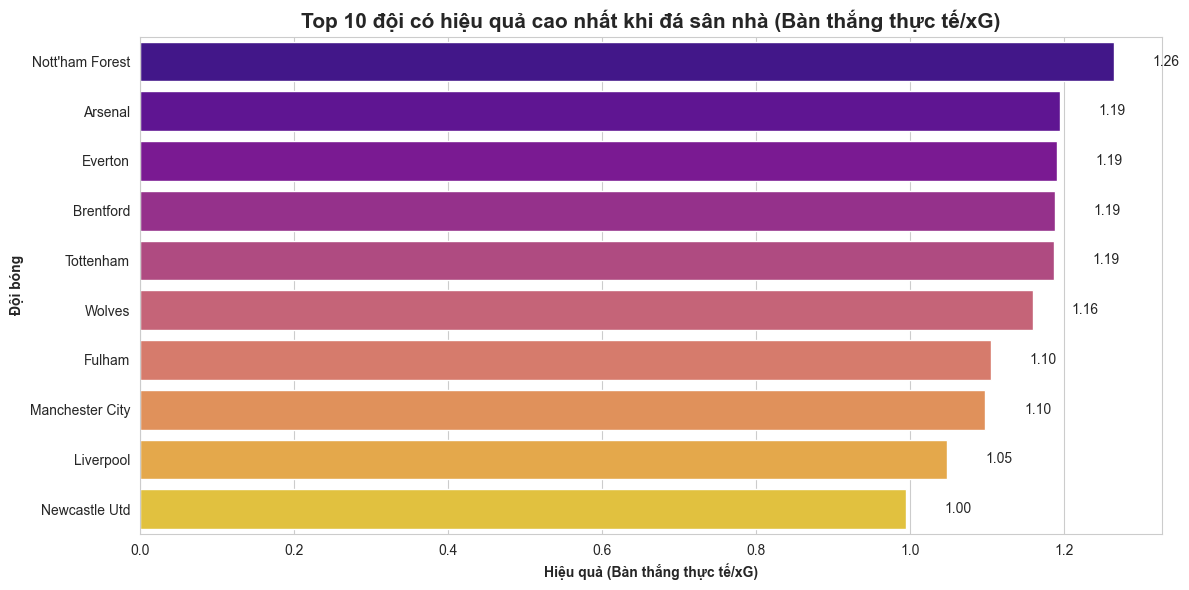

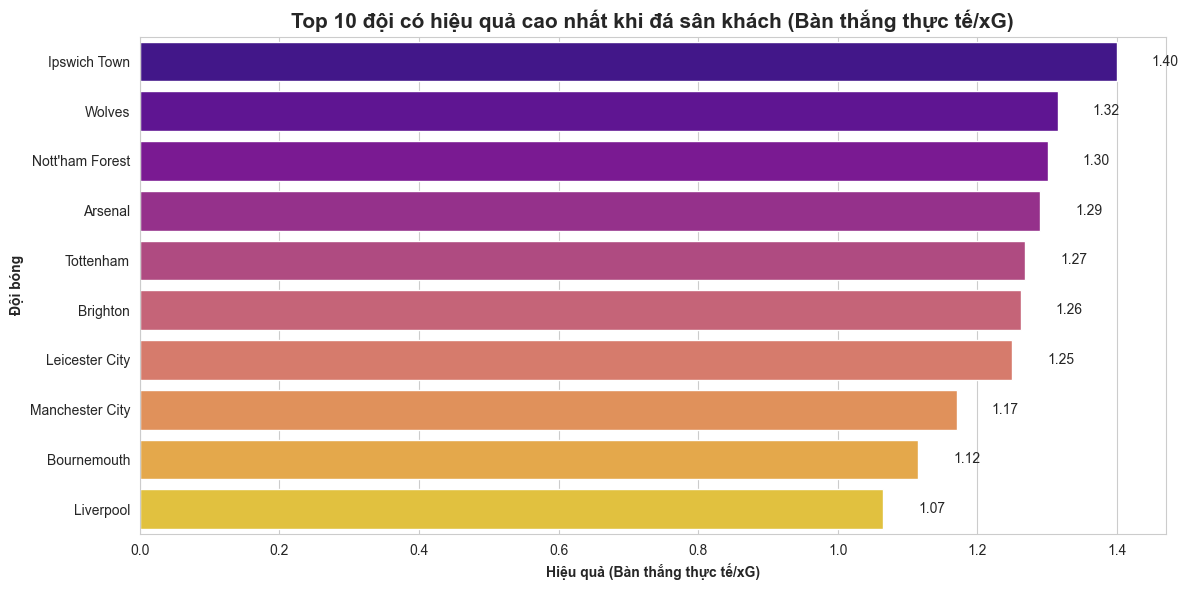

In [38]:
# Top 10 đội có hiệu quả cao nhất khi đá sân nhà (so với xG)
home_efficiency = df.groupby('Home')[['Home_Goals', 'xG_Home']].mean().reset_index()
home_efficiency['Efficiency'] = home_efficiency['Home_Goals'] / home_efficiency['xG_Home']
home_efficiency = home_efficiency.sort_values('Efficiency', ascending=False).head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Efficiency', y='Home', data=home_efficiency, palette='plasma')
plt.title('Top 10 đội có hiệu quả cao nhất khi đá sân nhà (Bàn thắng thực tế/xG)', fontsize=15, fontweight='bold')
plt.xlabel('Hiệu quả (Bàn thắng thực tế/xG)', fontweight='bold')
plt.ylabel('Đội bóng', fontweight='bold')

# Thêm giá trị hiệu quả vào cuối mỗi thanh
for i, v in enumerate(home_efficiency['Efficiency']):
    ax.text(v + 0.05, i, f"{v:.2f}", va='center')

plt.tight_layout()
plt.show()

# Top 10 đội có hiệu quả cao nhất khi đá sân khách (so với xG)
home_efficiency = df.groupby('Away')[['Away_Goals', 'xG_Away']].mean().reset_index()
home_efficiency['Efficiency'] = home_efficiency['Away_Goals'] / home_efficiency['xG_Away']
home_efficiency = home_efficiency.sort_values('Efficiency', ascending=False).head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Efficiency', y='Away', data=home_efficiency, palette='plasma')
plt.title('Top 10 đội có hiệu quả cao nhất khi đá sân khách (Bàn thắng thực tế/xG)', fontsize=15, fontweight='bold')
plt.xlabel('Hiệu quả (Bàn thắng thực tế/xG)', fontweight='bold')
plt.ylabel('Đội bóng', fontweight='bold')

# Thêm giá trị hiệu quả vào cuối mỗi thanh
for i, v in enumerate(home_efficiency['Efficiency']):
    ax.text(v + 0.05, i, f"{v:.2f}", va='center')

plt.tight_layout()
plt.show()


<Figure size 1400x1000 with 0 Axes>

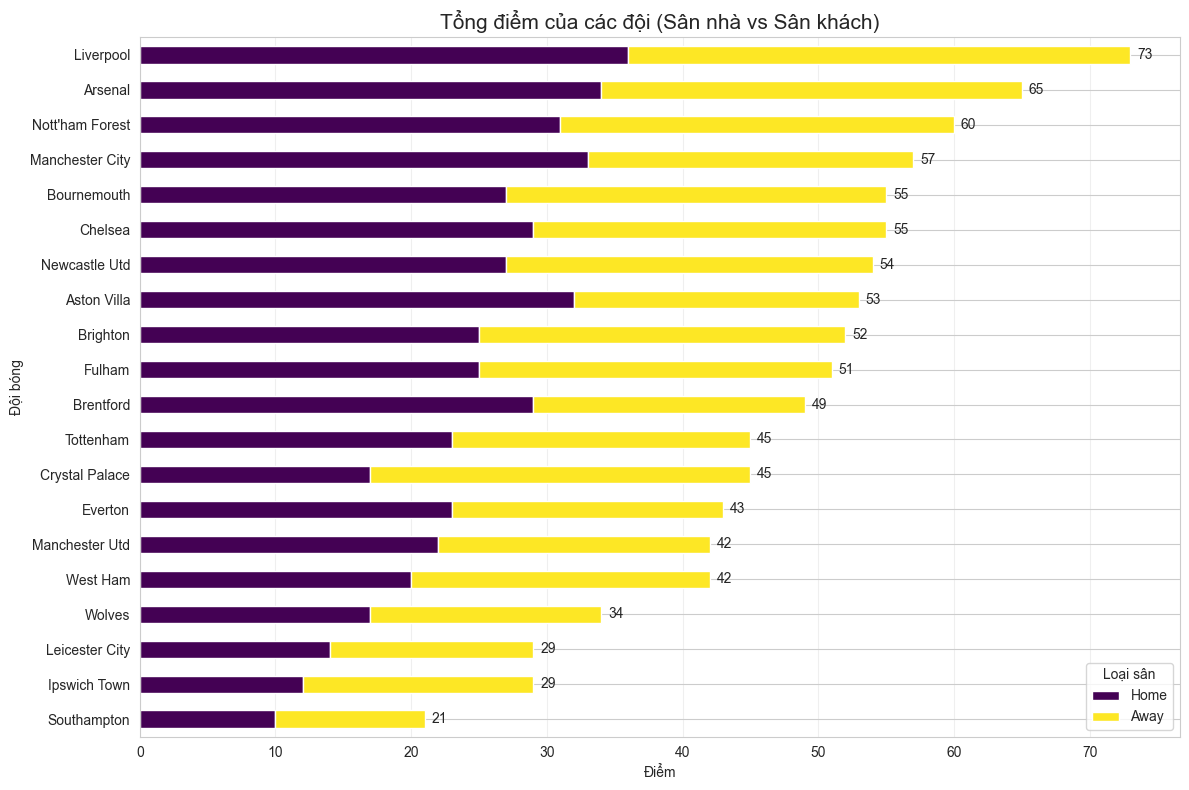

In [39]:
# Tạo bảng thứ hạng dựa trên kết quả
home_results = df.groupby('Home')['Result_Home'].value_counts().unstack().fillna(0)
away_results = df.groupby('Away')['Result_Home'].value_counts().unstack().fillna(0)

# Chuyển đổi kết quả cho đội khách (Win thành Loss, Loss thành Win)
if 'Win' in away_results.columns and 'Loss' in away_results.columns:
    away_win = away_results['Loss']
    away_loss = away_results['Win']
    away_results['Win'] = away_win
    away_results['Loss'] = away_loss

# Tính điểm
if 'Win' in home_results.columns and 'Draw' in home_results.columns and 'Loss' in home_results.columns:
    home_points = home_results['Win'] * 3 + home_results['Draw']
    home_points = home_points.to_frame('Points')
    home_points['Type'] = 'Home'

if 'Win' in away_results.columns and 'Draw' in away_results.columns and 'Loss' in away_results.columns:
    away_points = away_results['Win'] * 3 + away_results['Draw']
    away_points = away_points.to_frame('Points')
    away_points['Type'] = 'Away'

# Kết hợp điểm
team_points = pd.concat([home_points, away_points])
team_points = team_points.reset_index().rename(columns={'index': 'Team'})
team_points_pivot = team_points.pivot(index='Team', columns='Type', values='Points').fillna(0)
team_points_pivot['Total'] = team_points_pivot['Home'] + team_points_pivot['Away']
team_points_pivot = team_points_pivot.sort_values('Total', ascending=True)

# Vẽ biểu đồ điểm của các đội
plt.figure(figsize=(14, 10))
team_points_pivot[['Home', 'Away']].plot(kind='barh', stacked=True, colormap='viridis')
plt.title('Tổng điểm của các đội (Sân nhà vs Sân khách)', fontsize=15)
plt.xlabel('Điểm')
plt.ylabel('Đội bóng')
plt.legend(title='Loại sân')
plt.grid(axis='x', alpha=0.3)

# Thêm tổng điểm vào cuối mỗi thanh
for i, team in enumerate(team_points_pivot.index):
    plt.text(team_points_pivot.loc[team, 'Total'] + 0.5, i, 
             f"{team_points_pivot.loc[team, 'Total']:.0f}", 
             va='center')

plt.tight_layout()
plt.show()



### 3.4 Phân tích các chỉ số trong trận đấu


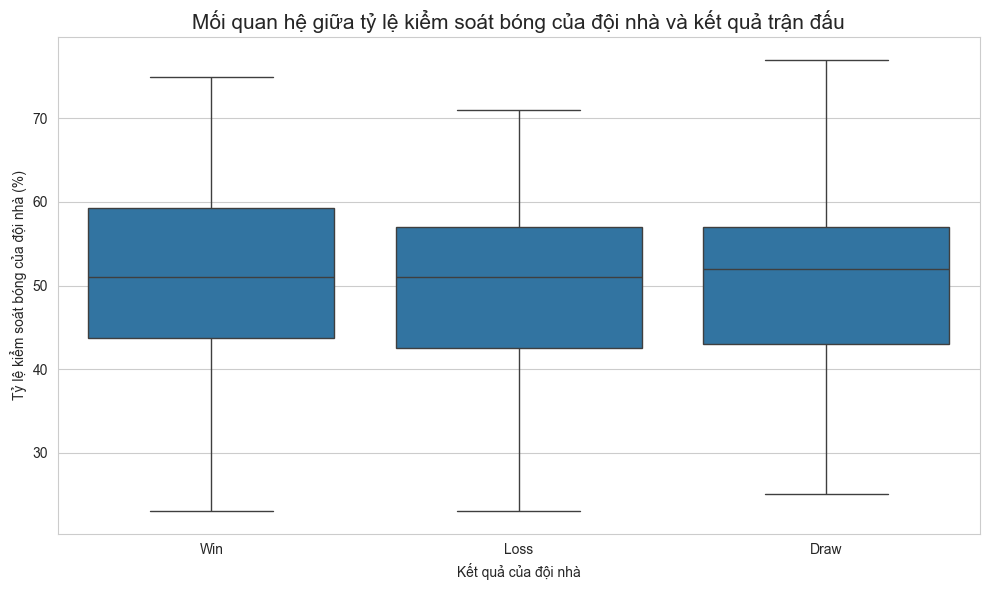

In [40]:
# Mối quan hệ giữa tỷ lệ kiểm soát bóng và kết quả trận đấu
plt.figure(figsize=(10, 6))
sns.boxplot(x='Result_Home', y='Possession_Home', data=df)
plt.title('Mối quan hệ giữa tỷ lệ kiểm soát bóng của đội nhà và kết quả trận đấu', fontsize=15)
plt.xlabel('Kết quả của đội nhà')
plt.ylabel('Tỷ lệ kiểm soát bóng của đội nhà (%)')
plt.tight_layout()
plt.show()


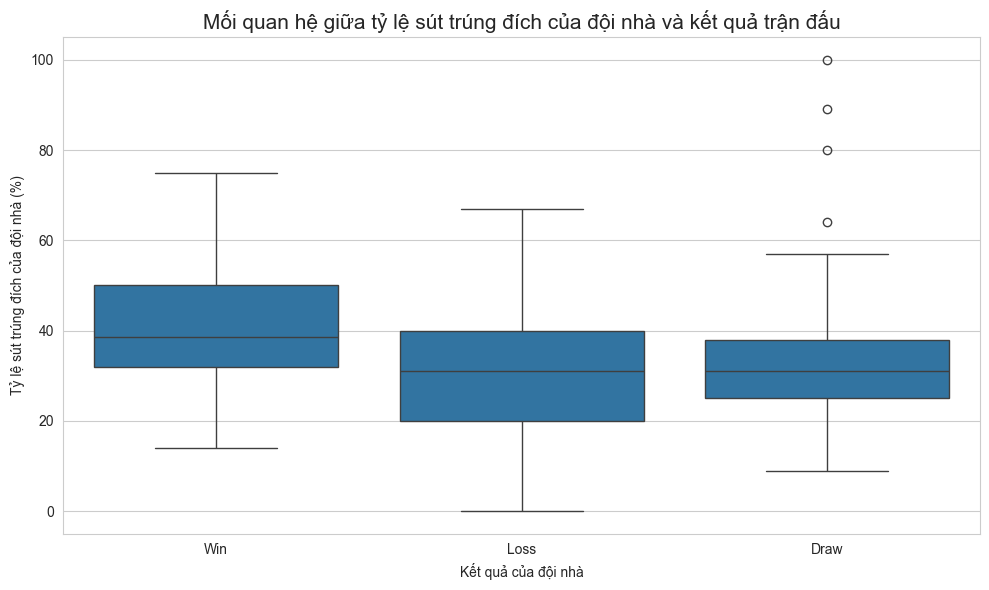

In [41]:

# Mối quan hệ giữa số cú sút trúng đích và kết quả trận đấu
plt.figure(figsize=(10, 6))
sns.boxplot(x='Result_Home', y='Shots_on_Target_Home', data=df)
plt.title('Mối quan hệ giữa tỷ lệ sút trúng đích của đội nhà và kết quả trận đấu', fontsize=15)
plt.xlabel('Kết quả của đội nhà')
plt.ylabel('Tỷ lệ sút trúng đích của đội nhà (%)')
plt.tight_layout()
plt.show()


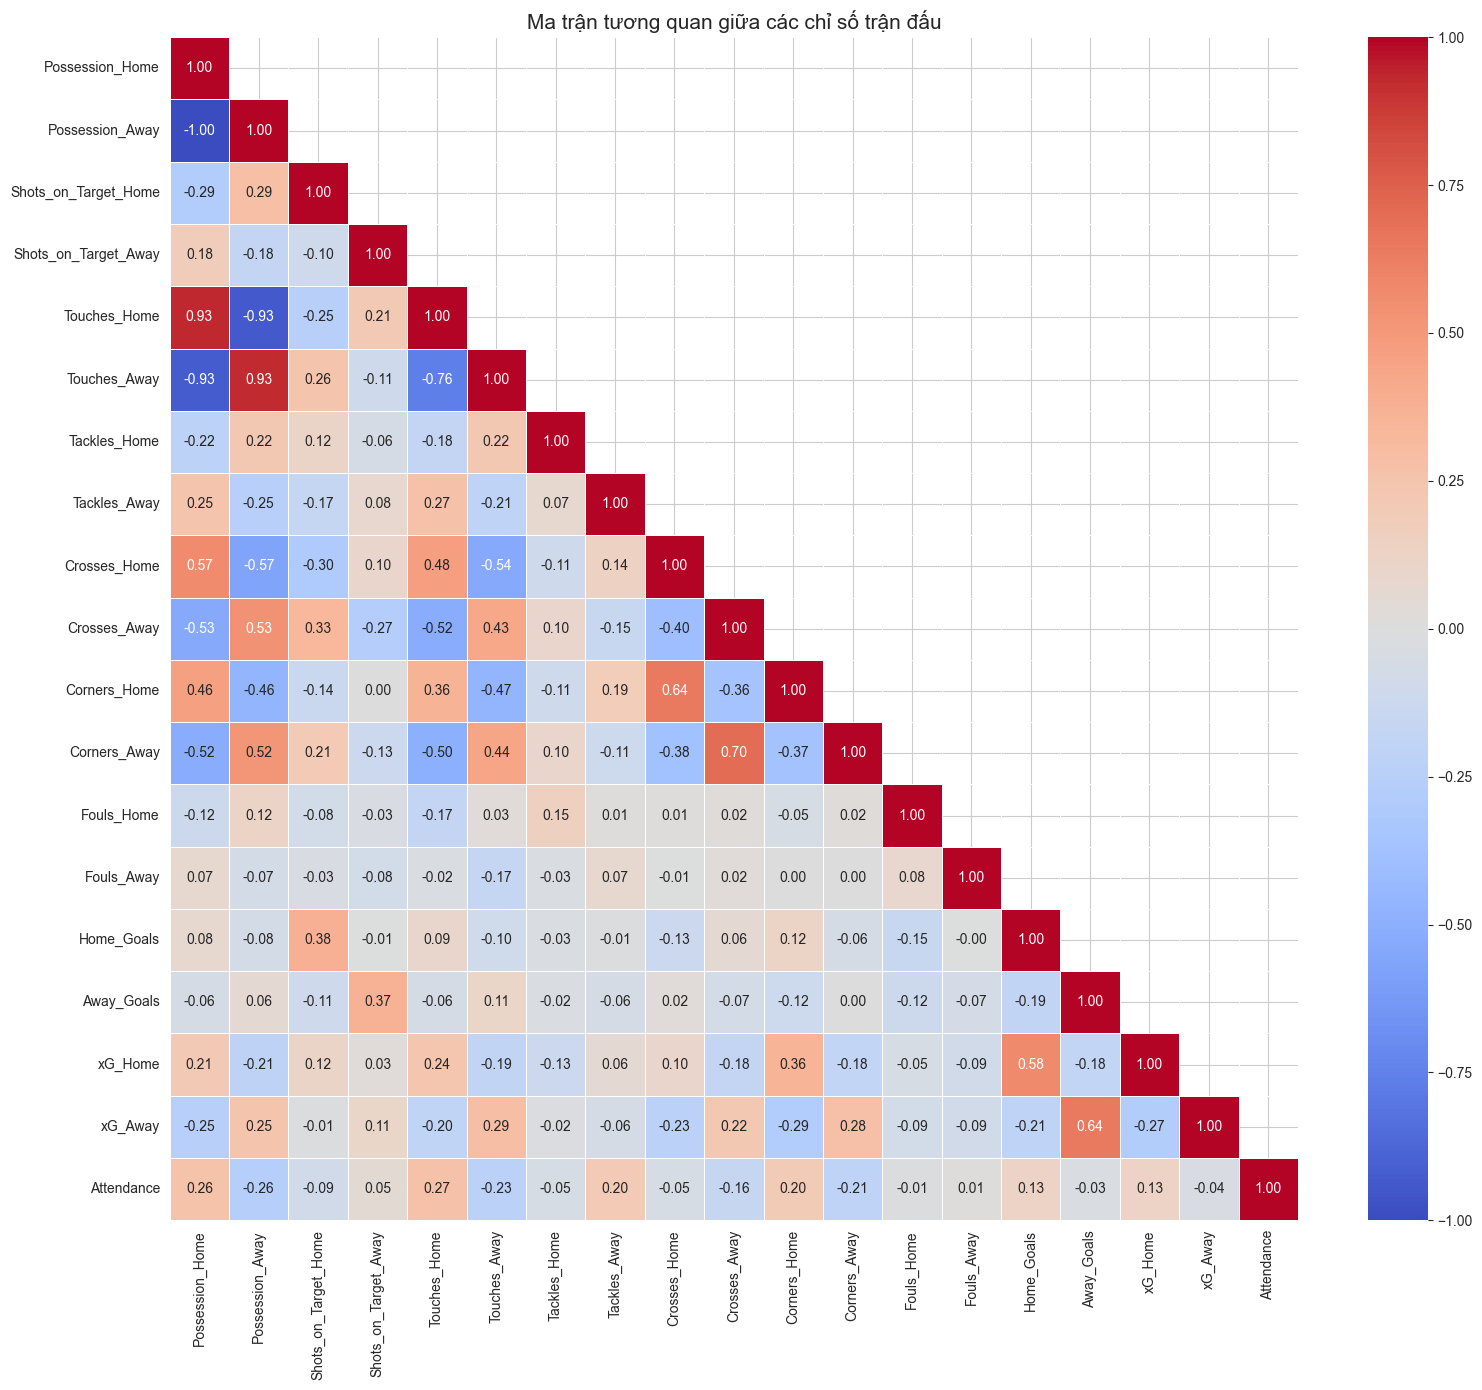

In [42]:

# Tạo ma trận tương quan giữa các chỉ số
correlation_columns = ['Possession_Home', 'Possession_Away', 
                       'Shots_on_Target_Home', 'Shots_on_Target_Away',
                       'Touches_Home', 'Touches_Away',
                       'Tackles_Home', 'Tackles_Away',
                       'Crosses_Home', 'Crosses_Away',
                       'Corners_Home', 'Corners_Away',
                       'Fouls_Home', 'Fouls_Away',
                       'Home_Goals', 'Away_Goals',
                       'xG_Home', 'xG_Away', 'Attendance']

correlation_matrix = df[correlation_columns].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k = 1)
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, mask = mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Ma trận tương quan giữa các chỉ số trận đấu', fontsize=15)
plt.tight_layout()
plt.show()


### 3.5 Phân tích thẻ phạt


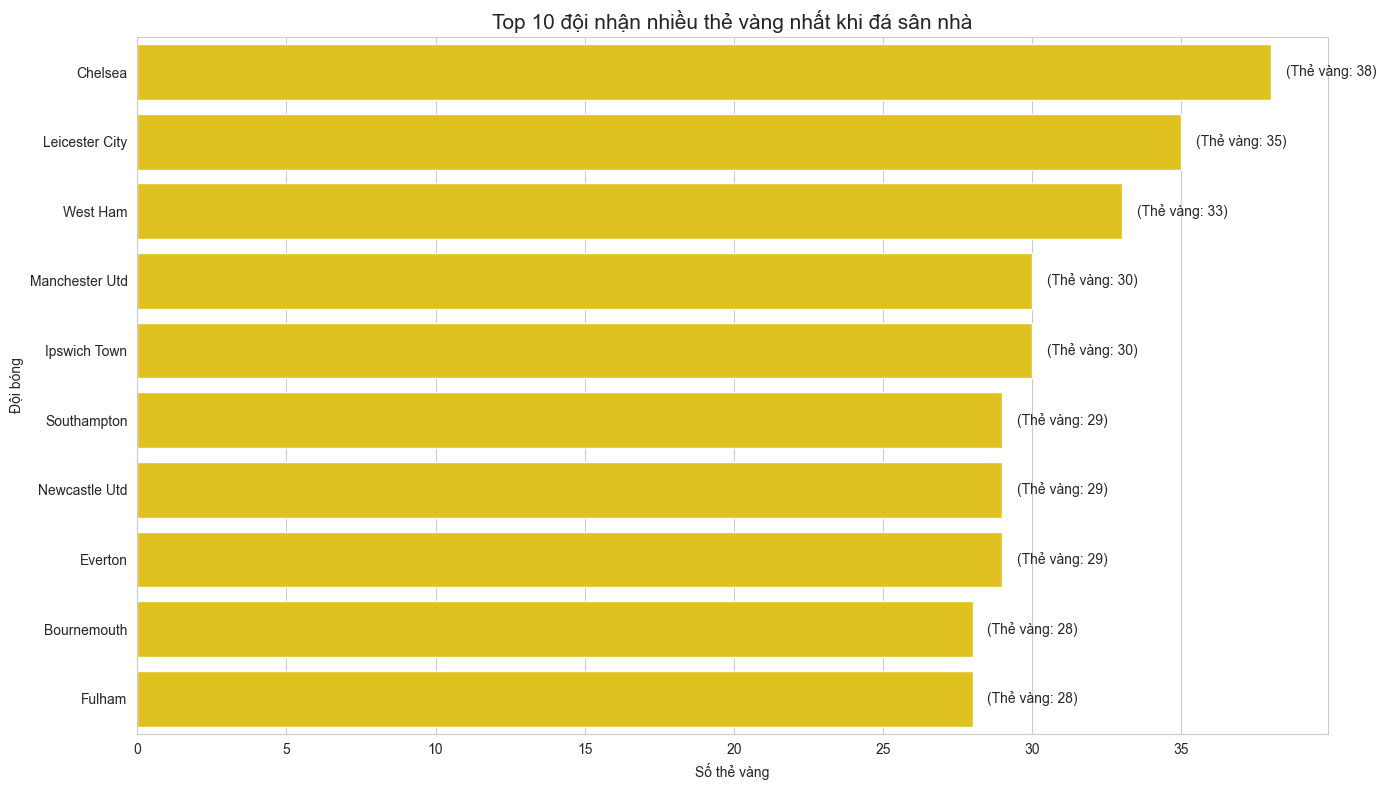

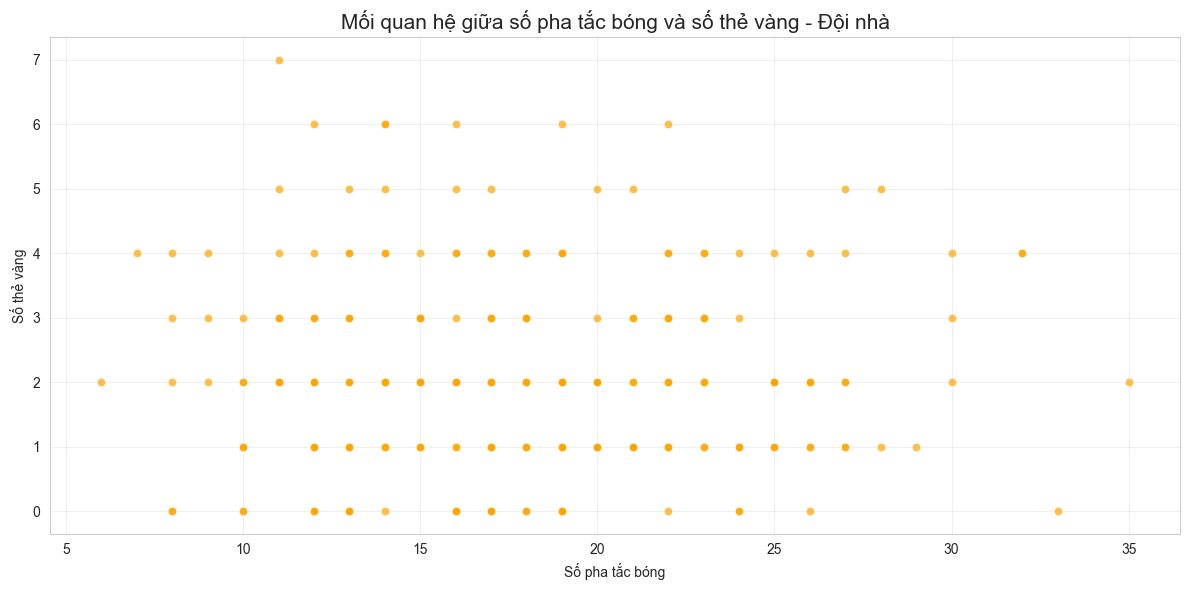

()

In [43]:
# Phân tích thẻ vàng và thẻ đỏ
cards_home = df.groupby('Home')[['Yellow_Cards_Home', 'Red_Cards_Home']].sum().reset_index()
cards_home = cards_home.sort_values('Yellow_Cards_Home', ascending=False).head(10)

plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Yellow_Cards_Home', y='Home', data=cards_home, color='gold')
plt.title('Top 10 đội nhận nhiều thẻ vàng nhất khi đá sân nhà', fontsize=15)
plt.xlabel('Số thẻ vàng')
plt.ylabel('Đội bóng')

# Thêm số thẻ đỏ
for i, v in enumerate(cards_home['Yellow_Cards_Home']):
    ax.text(v + 0.5, i, f"(Thẻ vàng: {cards_home['Yellow_Cards_Home'].iloc[i]})", va='center')

plt.tight_layout()
plt.show()

# Phân tích mối quan hệ giữa số pha tắc bóng và số thẻ vàng
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Tackles_Home', y='Yellow_Cards_Home', data=df, alpha=0.7, color='orange')

plt.title('Mối quan hệ giữa số pha tắc bóng và số thẻ vàng - Đội nhà', fontsize=15)
plt.xlabel('Số pha tắc bóng')
plt.ylabel('Số thẻ vàng')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
()

### 3.6 Phân tích sân vận động và khán giả


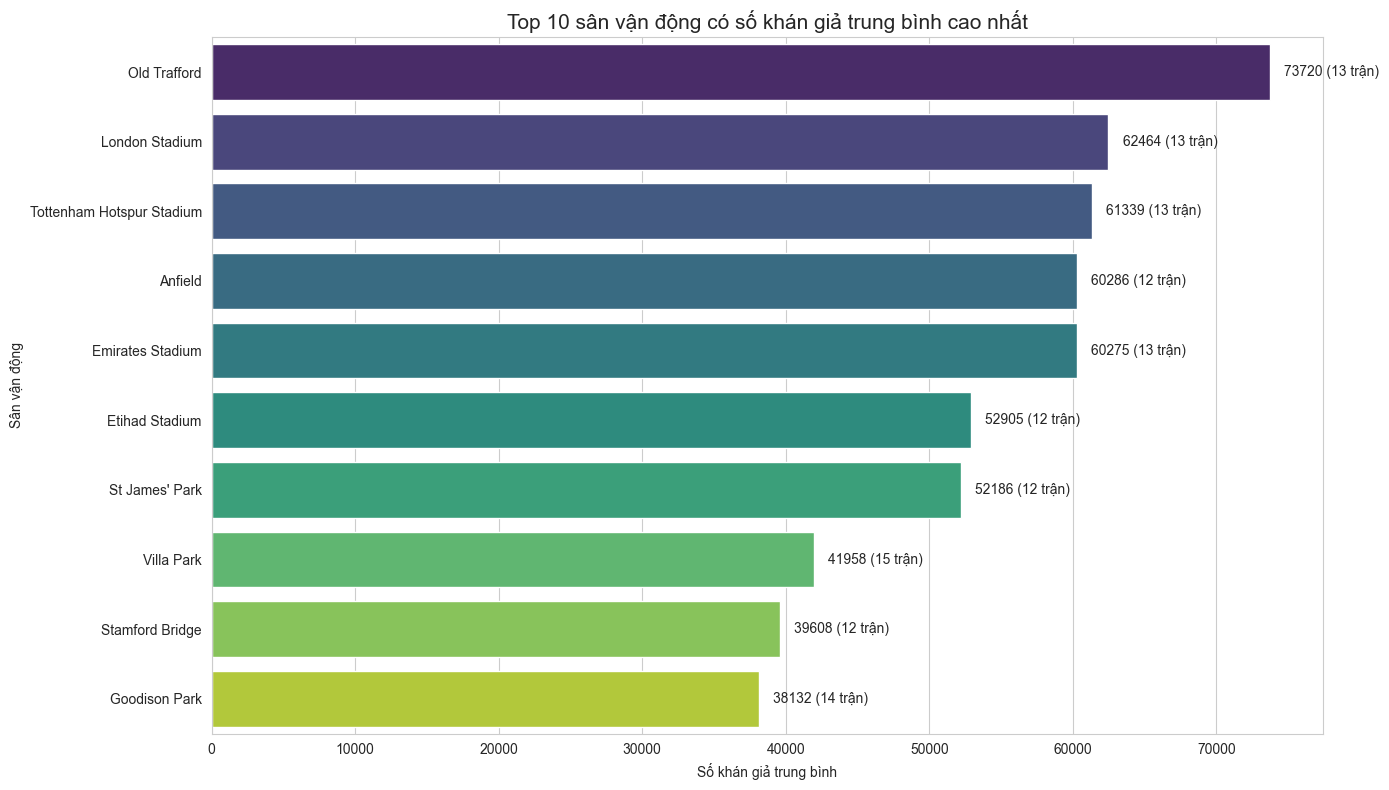

In [44]:
# Top 10 sân vận động có số khán giả trung bình cao nhất
attendance_by_venue = df.groupby('Venue')['Attendance'].agg(['mean', 'count']).reset_index()
attendance_by_venue = attendance_by_venue.sort_values('mean', ascending=False).head(10)

plt.figure(figsize=(14, 8))
ax = sns.barplot(x='mean', y='Venue', data=attendance_by_venue, palette='viridis')
plt.title('Top 10 sân vận động có số khán giả trung bình cao nhất', fontsize=15)
plt.xlabel('Số khán giả trung bình')
plt.ylabel('Sân vận động')

# Thêm số trận đấu vào cuối mỗi thanh
for i, v in enumerate(attendance_by_venue['mean']):
    ax.text(v + 1000, i, f"{v:.0f} ({attendance_by_venue['count'].iloc[i]} trận)", va='center')

plt.tight_layout()
plt.show()



### 3.7 Phân tích HLV


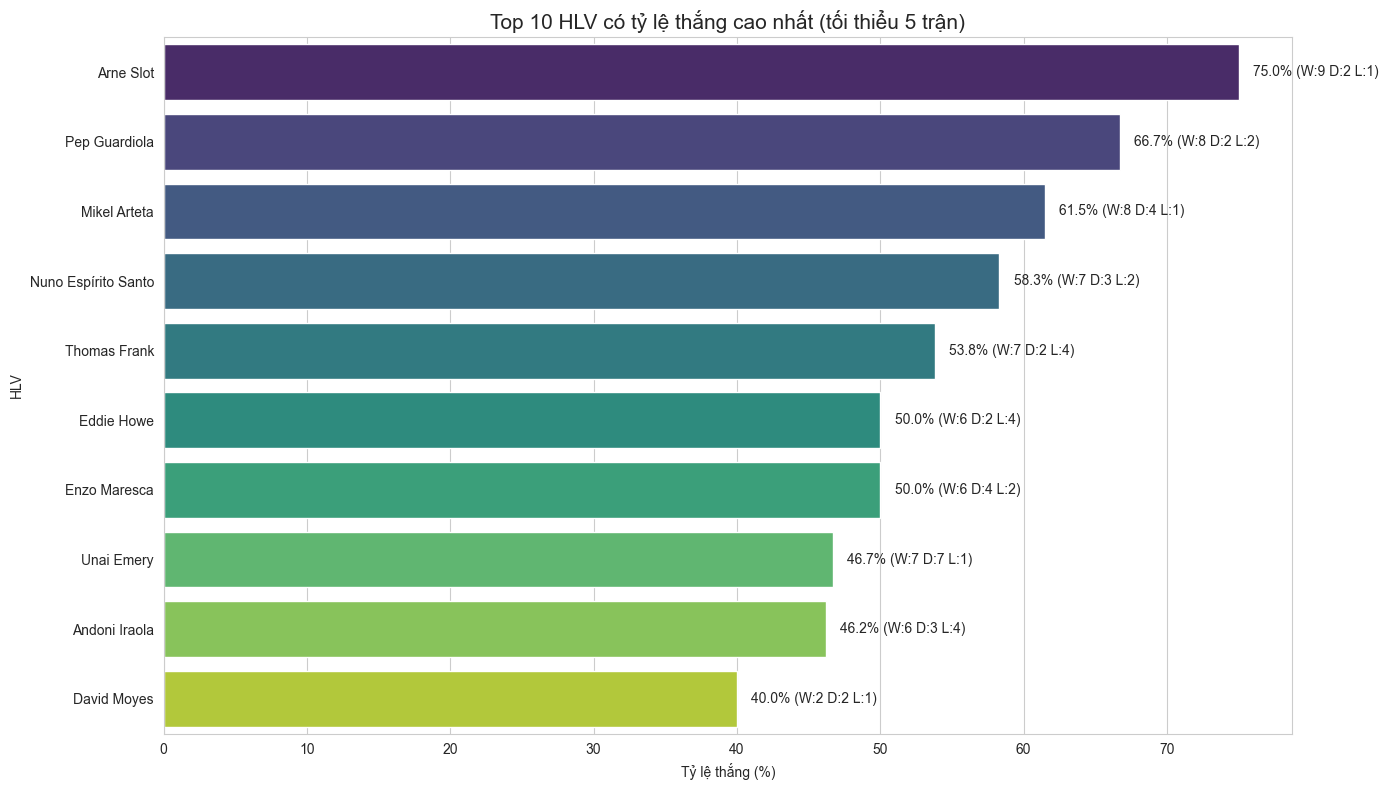

In [45]:

# Hiệu suất của các HLV đội nhà
coach_performance = df.groupby('Manager_Home')['Result_Home'].value_counts().unstack().fillna(0)
if 'Win' in coach_performance.columns and 'Draw' in coach_performance.columns and 'Loss' in coach_performance.columns:
    coach_performance['Total_Matches'] = coach_performance.sum(axis=1)
    coach_performance['Win_Rate'] = (coach_performance['Win'] / coach_performance['Total_Matches'] * 100).round(1)
    coach_performance = coach_performance.sort_values('Win_Rate', ascending=False)
    
    # Lọc các HLV có ít nhất 5 trận
    coach_performance_filtered = coach_performance[coach_performance['Total_Matches'] >= 5].head(10)
    
    plt.figure(figsize=(14, 8))
    ax = sns.barplot(x=coach_performance_filtered['Win_Rate'], y=coach_performance_filtered.index, data=coach_performance_filtered, palette='viridis')
    plt.title('Top 10 HLV có tỷ lệ thắng cao nhất (tối thiểu 5 trận)', fontsize=15)
    plt.xlabel('Tỷ lệ thắng (%)')
    plt.ylabel('HLV')
    
    # Thêm thông tin về số trận thắng/thua/hòa
    for i, v in enumerate(coach_performance_filtered['Win_Rate']):
        coach = coach_performance_filtered.index[i]
        text = f"{v}% (W:{coach_performance_filtered.loc[coach, 'Win']:.0f} D:{coach_performance_filtered.loc[coach, 'Draw']:.0f} L:{coach_performance_filtered.loc[coach, 'Loss']:.0f})"
        ax.text(v + 1, i, text, va='center')
    
    plt.tight_layout()
    plt.show()


### 3.8 Phân tích đội hình


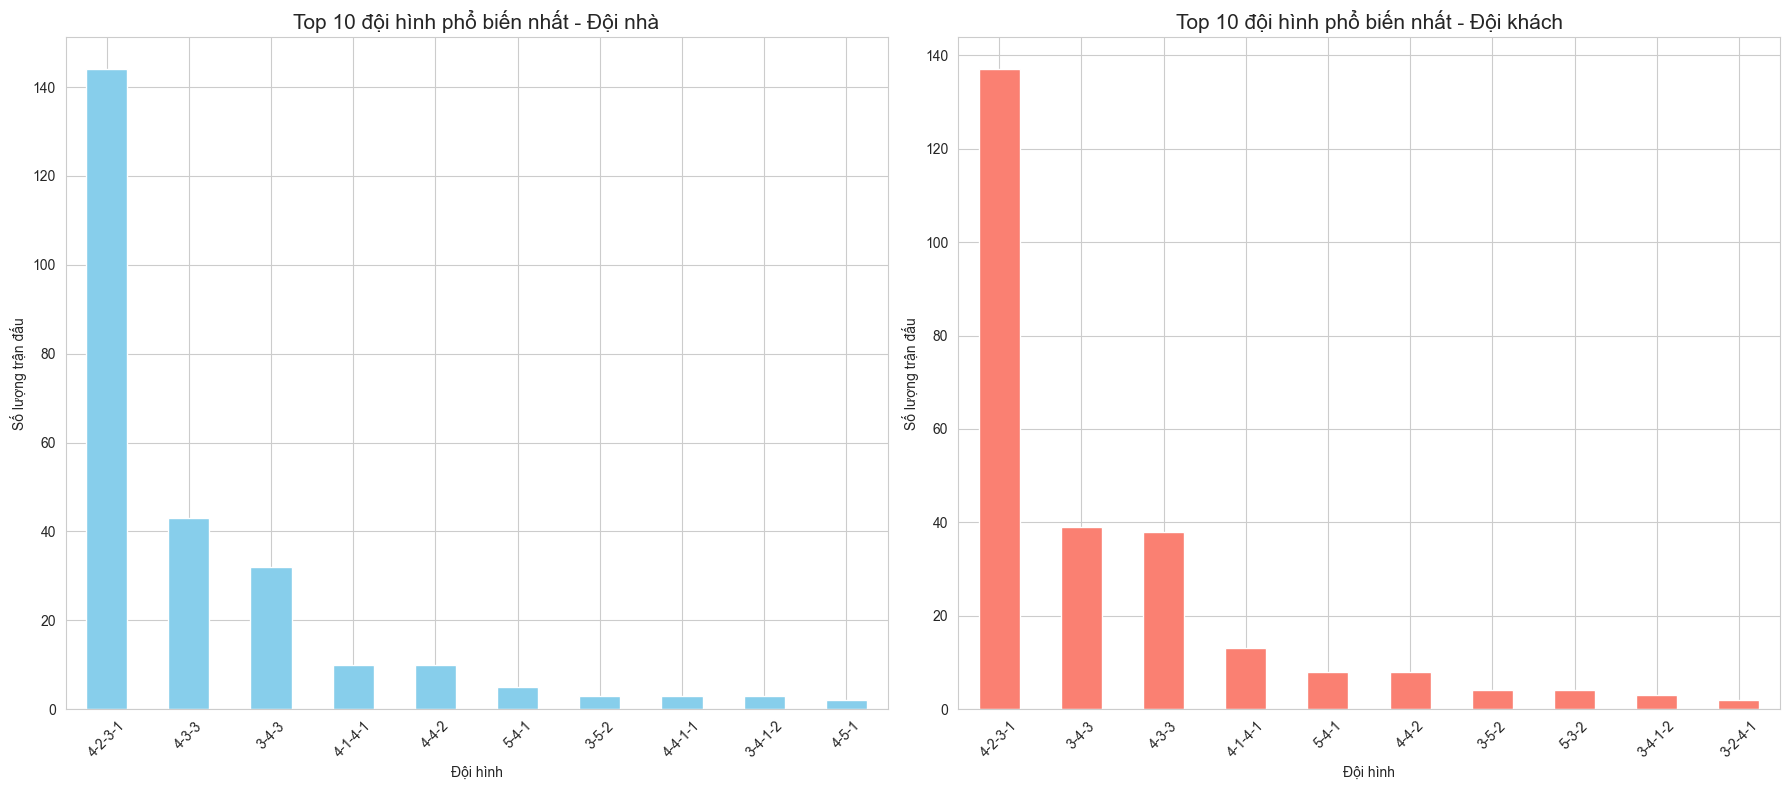

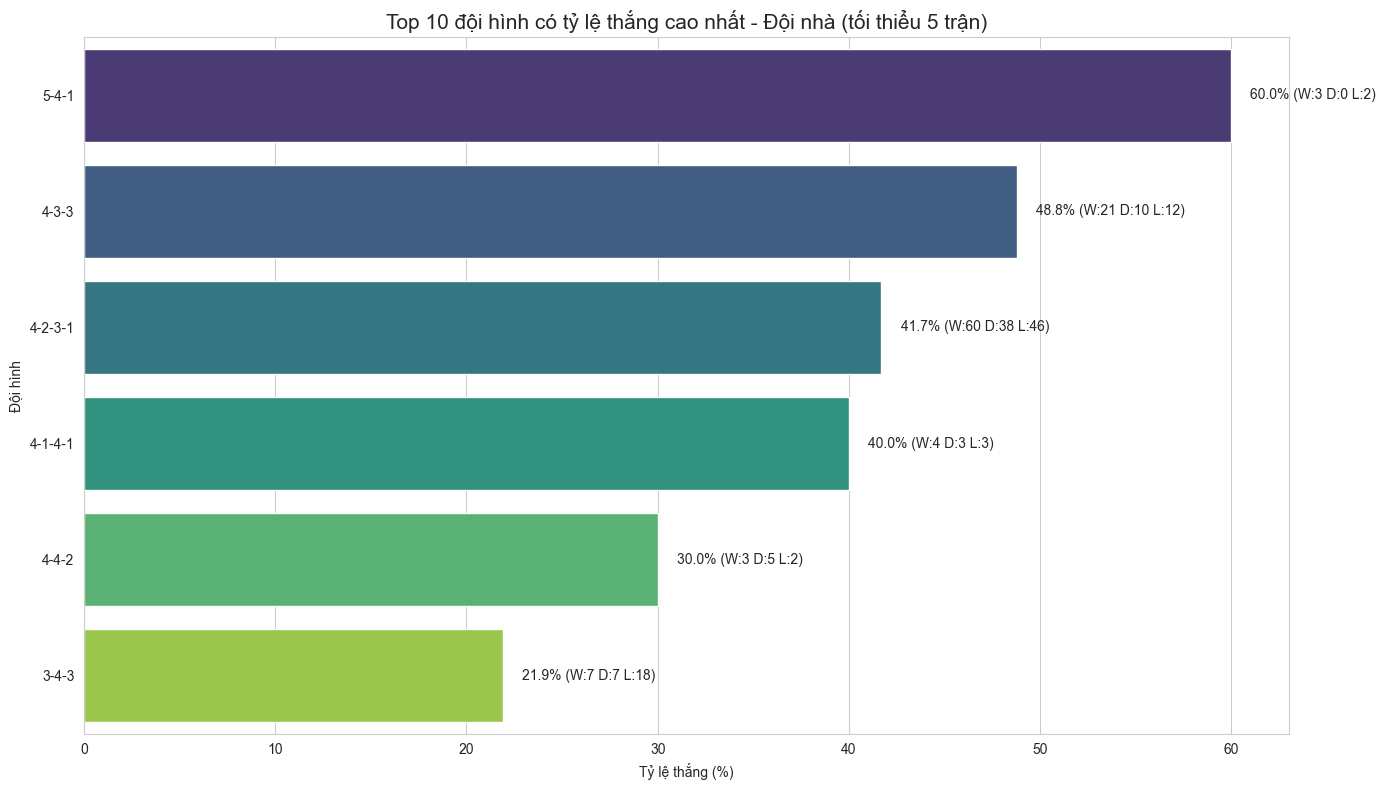

In [46]:
# Phân tích chiến thuật phổ biến
formation_home = df['Lineup_Home'].value_counts().head(10)
formation_away = df['Lineup_Away'].value_counts().head(10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Đội hình đội nhà
formation_home.plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Top 10 đội hình phổ biến nhất - Đội nhà', fontsize=15)
ax1.set_xlabel('Đội hình')
ax1.set_ylabel('Số lượng trận đấu')
ax1.set_xticklabels(formation_home.index, rotation=45)

# Đội hình đội khách
formation_away.plot(kind='bar', ax=ax2, color='salmon')
ax2.set_title('Top 10 đội hình phổ biến nhất - Đội khách', fontsize=15)
ax2.set_xlabel('Đội hình')
ax2.set_ylabel('Số lượng trận đấu')
ax2.set_xticklabels(formation_away.index, rotation=45)

plt.tight_layout()
plt.show()

# Phân tích hiệu suất của các đội hình khác nhau (Đội nhà)
formation_home_performance = df.groupby('Lineup_Home')['Result_Home'].value_counts().unstack().fillna(0)
if 'Win' in formation_home_performance.columns and 'Draw' in formation_home_performance.columns and 'Loss' in formation_home_performance.columns:
    formation_home_performance['Total_Matches'] = formation_home_performance.sum(axis=1)
    formation_home_performance['Win_Rate'] = (formation_home_performance['Win'] / formation_home_performance['Total_Matches'] * 100).round(1)
    
    # Lọc các đội hình có ít nhất 5 trận
    formation_filtered = formation_home_performance[formation_home_performance['Total_Matches'] >= 5].sort_values('Win_Rate', ascending=False).head(10)
    
    plt.figure(figsize=(14, 8))
    ax = sns.barplot(x='Win_Rate', y=formation_filtered.index, data=formation_filtered, palette='viridis')
    plt.title('Top 10 đội hình có tỷ lệ thắng cao nhất - Đội nhà (tối thiểu 5 trận)', fontsize=15)
    plt.xlabel('Tỷ lệ thắng (%)')
    plt.ylabel('Đội hình')
    
    # Thêm thông tin về số trận thắng/thua/hòa
    for i, v in enumerate(formation_filtered['Win_Rate']):
        formation = formation_filtered.index[i]
        text = f"{v}% (W:{formation_filtered.loc[formation, 'Win']:.0f} D:{formation_filtered.loc[formation, 'Draw']:.0f} L:{formation_filtered.loc[formation, 'Loss']:.0f})"
        ax.text(v + 1, i, text, va='center')
    
    plt.tight_layout()
    plt.show()